In [1]:
# installing required libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("D:\\Projects\\project_datasets\\google_paly_store_dataset\\google_play_store_cleaned_data.csv")

In [3]:
df.head()

,App Name,Category,Rating,Reviews,Installs,Free,Price,Content Rating,Editors Choice,Ad Supported,Released,Size_MB
0,Gakondo,Adventure,0.0,0,15,True,0.0,Everyone,False,False,2020,10.0
1,Ampere Battery Info,Tools,4.4,64,7662,True,0.0,Everyone,False,True,2020,2.9
2,Vibook,Productivity,0.0,0,58,True,0.0,Everyone,False,False,2019,3.7
3,Smart City Trichy Public Service Vehicles 17UC...,Communication,5.0,5,19,True,0.0,Everyone,False,True,2018,1.8
4,GROW.me,Tools,0.0,0,478,True,0.0,Everyone,False,False,2020,6.2


####

## Data Visualization

In [4]:
df.describe()

,Rating,Reviews,Installs,Price,Released,Size_MB
count,2.312743e+06,2.312743e+06,2.312743e+06,2.312743e+06,2.312743e+06,2.237953e+06
mean,2.209983e+00,2.836801e+03,3.202287e+05,1.035071e-01,2.018226e+03,1.920164e+01
std,2.096992e+00,2.111198e+05,2.355598e+07,2.633240e+00,2.136423e+00,2.388617e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.010000e+03,3.125000e-03
25%,0.000000e+00,0.000000e+00,8.400000e+01,0.000000e+00,2.017000e+03,4.900000e+00
50%,2.900000e+00,6.000000e+00,6.950000e+02,0.000000e+00,2.019000e+03,1.000000e+01
75%,4.300000e+00,4.100000e+01,7.355000e+03,0.000000e+00,2.020000e+03,2.500000e+01
max,5.000000e+00,1.385576e+08,1.205763e+10,4.000000e+02,2.021000e+03,1.020000e+03


#### Correlation between Numerical variables 

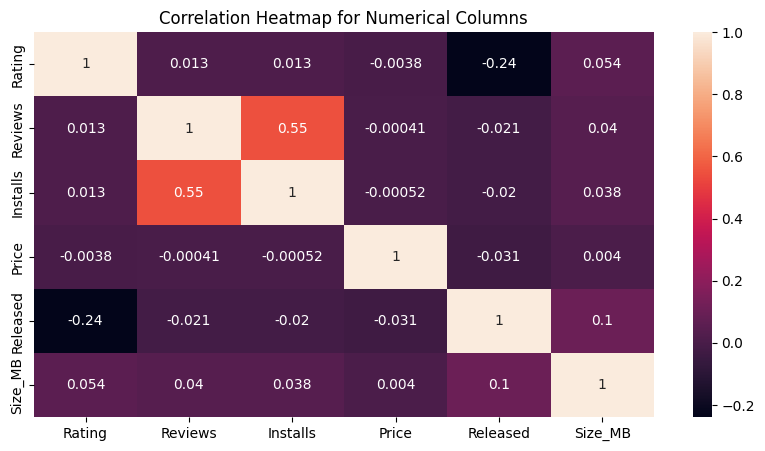

In [5]:
# Filter out only numerical columns
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Correlation Heatmap
plt.figure(figsize=(10, 5))
corr = numerical_df.corr()
sns.heatmap(corr, annot=True)
plt.title('Correlation Heatmap for Numerical Columns')
plt.show()

- Reviews and Install colummn has high correlation compared to others

####

#### App Category Distribution

In [6]:
category_counts = df['Category'].value_counts()

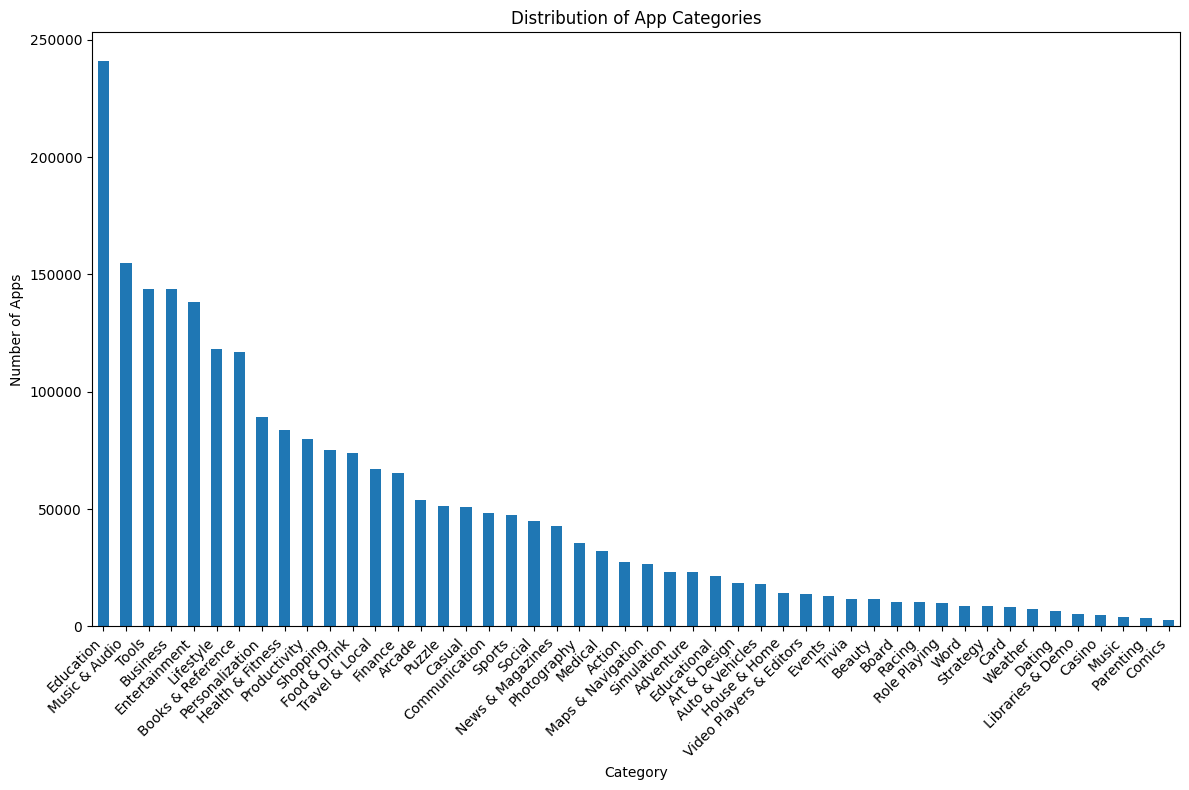

In [7]:
plt.figure(figsize=(12, 8))
category_counts.plot(kind='bar')
plt.title('Distribution of App Categories')
plt.xlabel('Category')
plt.ylabel('Number of Apps')
plt.xticks(rotation=45, ha='right')  # Rotating X-Axis category names
plt.tight_layout()
plt.show()

- Education, Music & Audio, and Tools are the top three categories on the Google Play Store.
- Categories like Business, Entertainment, and Lifestyle also have significant representation.
- Developers should consider these popular categories for app development for user demand effectively.




####

#### Rating Distribution

In [8]:
Apps_without_0_reviews_rating = df[(df['Reviews'] != 0) & (df['Rating'] != 0)]

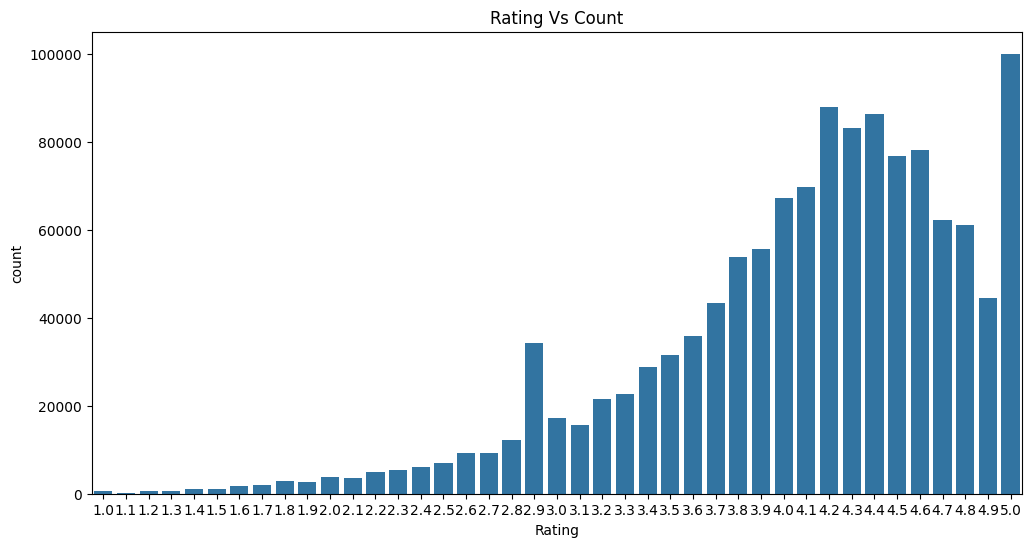

In [9]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=0)
plt.title("Rating Vs Count")
ax = sns.countplot(x="Rating", data=Apps_without_0_reviews_rating)

- As you can see, rating categories 5.0, 4.2, 4.3, 4.4, 4.6 are the top ratings in the dataset.
- 
The rating category 0.0 represents apps that have not been given any rating or are new to the marke
- As per my knowlwdge and  experience, most of the apps rating are between 3.7 to 4.3.

####

#### Top Reviewed Apps by Category

In [10]:
category_reviews = df.groupby('Category')['Reviews'].sum().reset_index()

In [11]:
category_reviews = category_reviews.sort_values(by='Reviews', ascending=False)

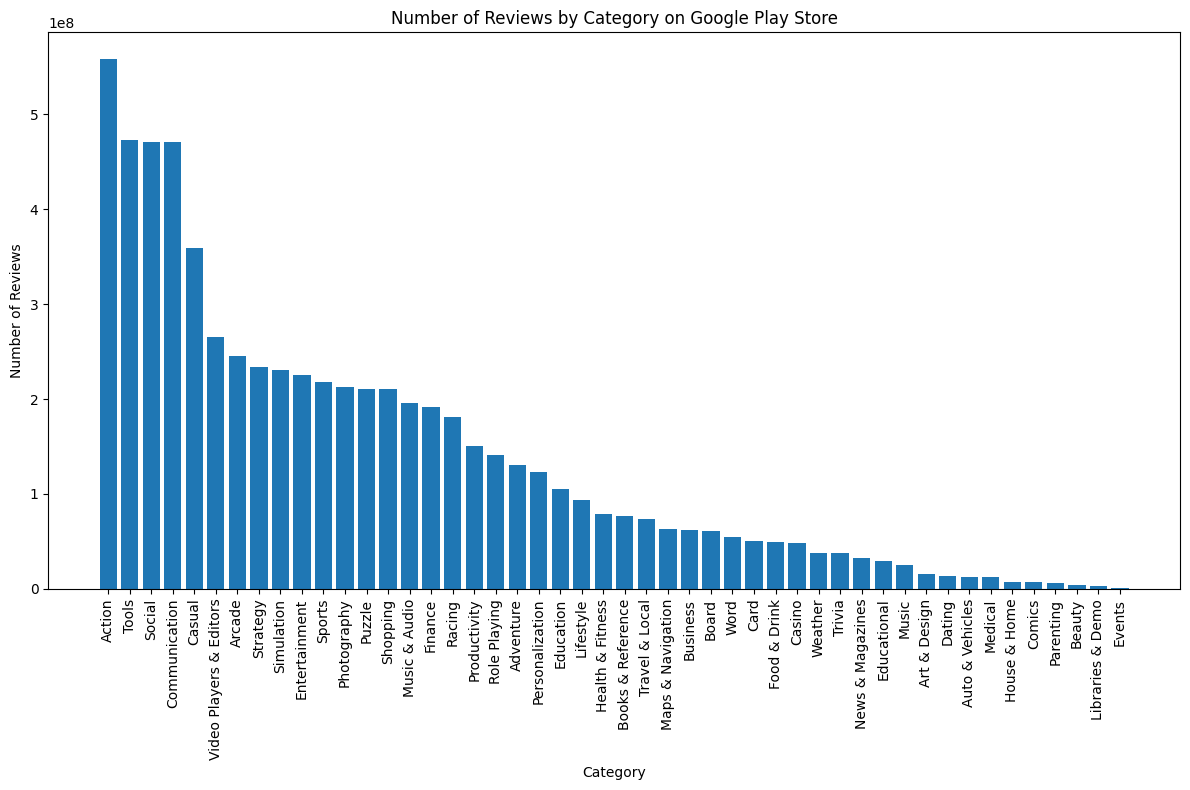

In [12]:
# Create a bar chart
plt.figure(figsize=(12, 8))
plt.bar(category_reviews['Category'], category_reviews['Reviews'])
plt.xlabel('Category')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews by Category on Google Play Store')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

As you can see, Action, Tools, Social, Communication, and Casual are the categories with the highest number of reviews and ratings from users.

####

#### Installs by Category 

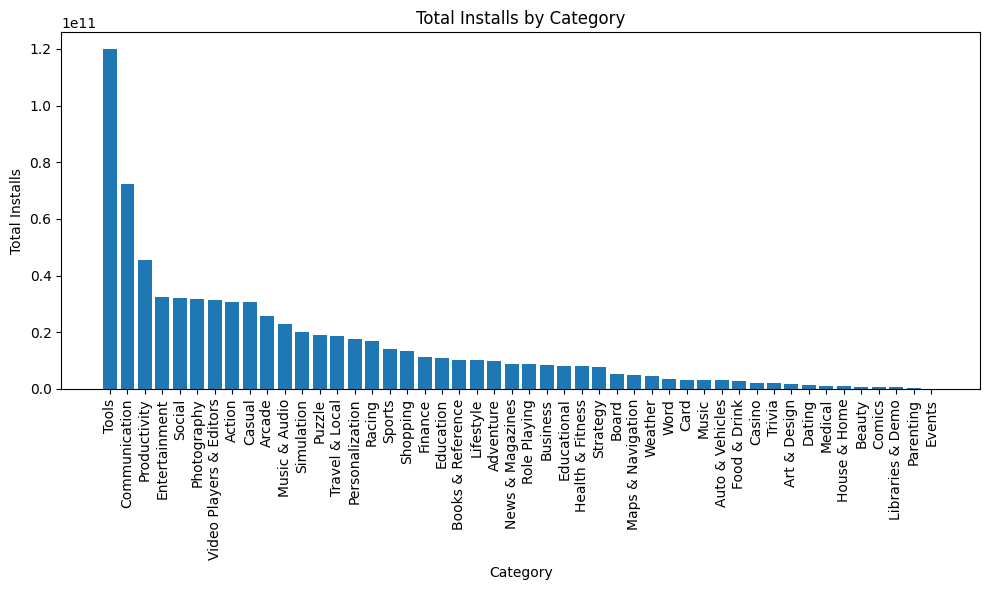

In [13]:
categorywise_installed_apps = df.groupby(['Category'])[['Installs']].sum().sort_values(by = 'Installs', ascending = False)

# Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(categorywise_installed_apps.index, categorywise_installed_apps['Installs'])
plt.xlabel('Category')
plt.ylabel('Total Installs')
plt.title('Total Installs by Category')
plt.xticks(rotation=90)
plt.tight_layout()

Tools, Communication, Productivity, Social, and Entertainment categories have the most number of installs.

In [14]:
# Most Number of Install by apps (Top 10)

top10_installed_apps = df.groupby(['App Name'])[['Installs']].sum().sort_values(by = 'Installs', ascending = False)
top10_installed_apps[0:10]

,Installs
App Name,
Google Play services,12057627016
YouTube,9766230924
Google,9154248491
Google Maps - Navigate & Explore,9141671889
Google Text-to-Speech,9034404884
Google Chrome: Fast & Secure,8925640788
Gmail,8756574289
Android Accessibility Suite,7408134567
Google Drive,7028265259


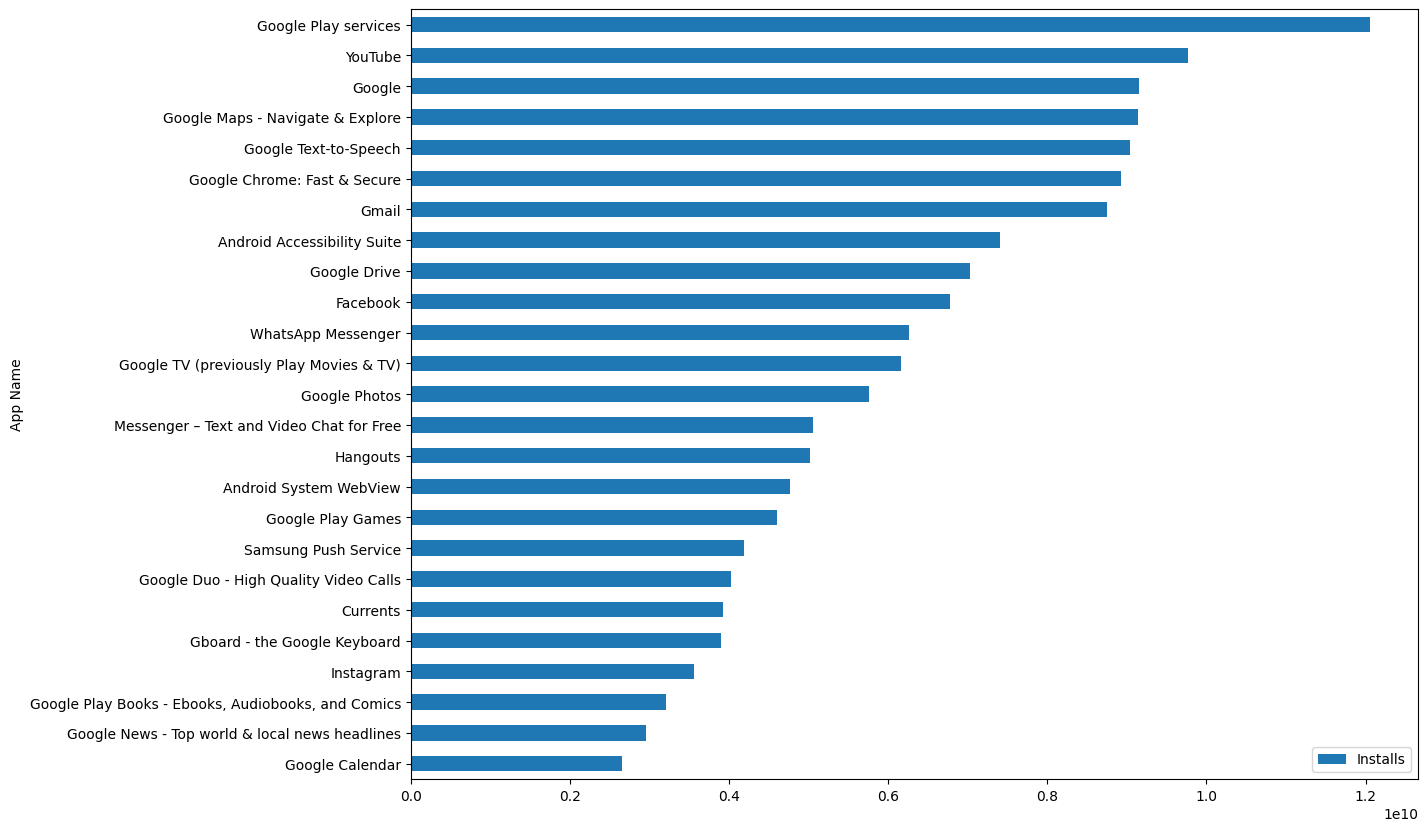

In [15]:
top10_installed_apps[0:25].plot(kind = 'barh', figsize=(13, 10)).invert_yaxis()

####

#### Intalls and Reviews Relationship

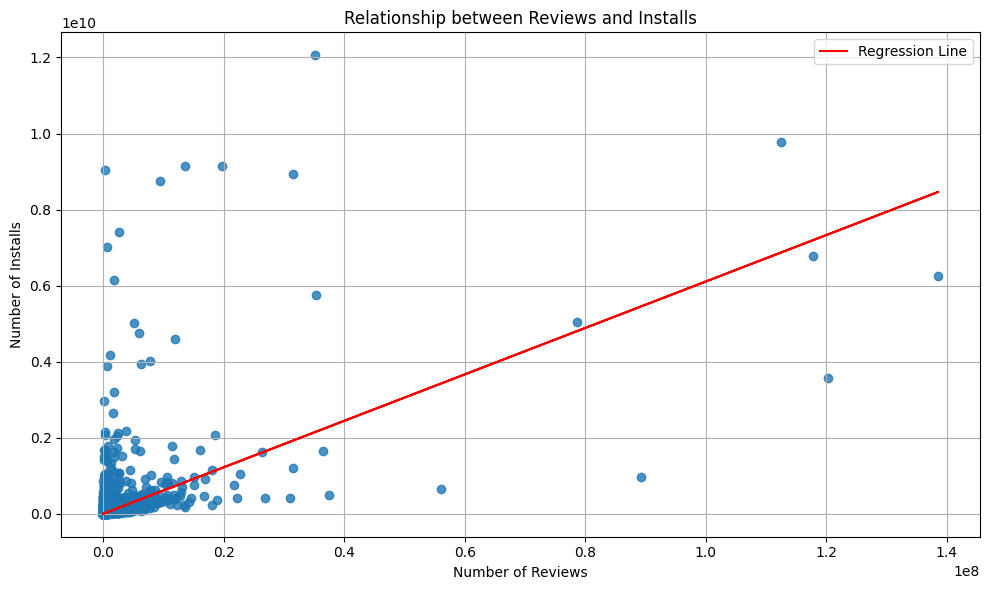

In [16]:
# Create scatter plot
from scipy import stats

plt.figure(figsize=(10, 6))
plt.scatter(Apps_without_0_reviews_rating['Reviews'], Apps_without_0_reviews_rating['Installs'], alpha=0.8)

# Calculate regression line
slope, intercept, r_value, p_value, std_err = stats.linregress(Apps_without_0_reviews_rating['Reviews'], Apps_without_0_reviews_rating['Installs'])
regression_line = slope * Apps_without_0_reviews_rating['Reviews'] + intercept
plt.plot(Apps_without_0_reviews_rating['Reviews'], regression_line, color='red', label='Regression Line')

plt.title('Relationship between Reviews and Installs')
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Installs')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

As you can see a pattern in the figure, there is a positive correlation between the Installs and Reviews columns. When the number of reviews increases, the number of installs also increases.

#### 

####

#### Average Size by Category 

In [17]:
average_size_by_category = df.groupby('Category')['Size_MB'].mean().reset_index()
average_size_by_category[:5]

,Category,Size_MB
0,Action,42.112178
1,Adventure,36.797393
2,Arcade,26.873677
3,Art & Design,15.569112
4,Auto & Vehicles,17.916531


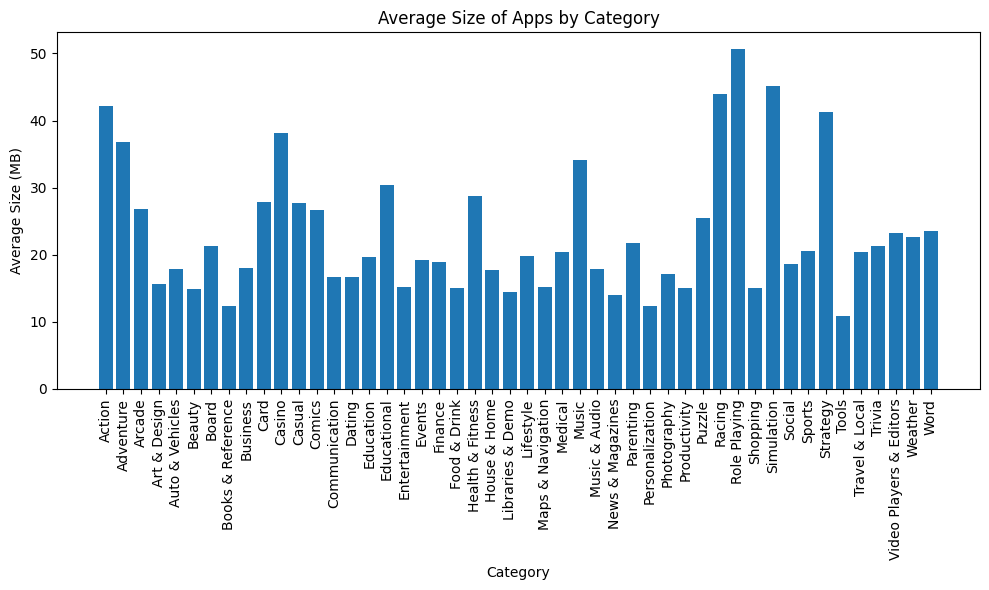

In [18]:
# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(average_size_by_category['Category'], average_size_by_category['Size_MB'])
plt.xlabel('Category')
plt.ylabel('Average Size (MB)')
plt.title('Average Size of Apps by Category')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

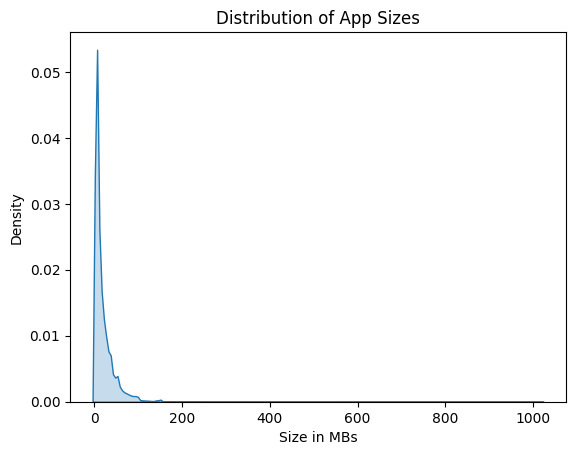

In [19]:
# distribution of app sizes
sns.kdeplot(df['Size_MB'], fill=True)
plt.title('Distribution of App Sizes')
plt.xlabel('Size in MBs')
plt.ylabel('Density')
plt.show()

Most of the app sizes are in between 0 to 100 

#### Free vs Paid Apps

In [20]:
df["Free"].value_counts()

Free
True     2267677
False      45066
Name: count, dtype: int64

In [21]:
df_type = Apps_without_0_reviews_rating[['Rating','Free', 'Reviews']]
df_type

,Rating,Free,Reviews
1,4.4,True,64
3,5.0,True,5
6,4.5,True,12
7,2.0,True,39
9,4.7,True,820
...,...,...,...
2312731,4.0,True,344
2312736,3.4,True,17
2312737,4.3,True,16775
2312740,3.5,True,8


In [22]:
p_mean = df_type.loc[df_type['Free'] == False, 'Rating'].mean()
print(f"Average Rating of Paid Apps = {p_mean}")

Average Rating of Paid Apps = 4.137525221170263


In [23]:
p_mean = df_type.loc[df_type['Free'] == True, 'Rating'].mean()
print(f"Average Rating of Paid Apps = {p_mean}")

Average Rating of Paid Apps = 4.077945484428487


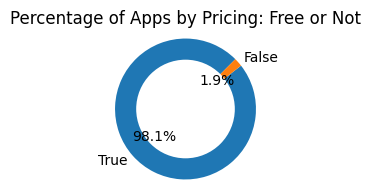

In [24]:
import matplotlib.pyplot as plt

# Assuming df["Free"] contains boolean values indicating whether the app is free or not
number_of_apps = df["Free"].value_counts()

sizes = number_of_apps.values
labels = number_of_apps.index

plt.figure(figsize=(2, 2))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=45)

# Draw a white circle at the center to make it look like a donut
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Percentage of Apps by Pricing: Free or Not')

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


####

#### Number of Apps by Content Rating

In [25]:
number_of_apps_content_rating = df["Content Rating"].value_counts()
number_of_apps_content_rating

Content Rating
Everyone           2021923
Teen                196349
Mature 17+           60283
Everyone 10+         33898
Unrated                154
Adults only 18+        136
Name: count, dtype: int64

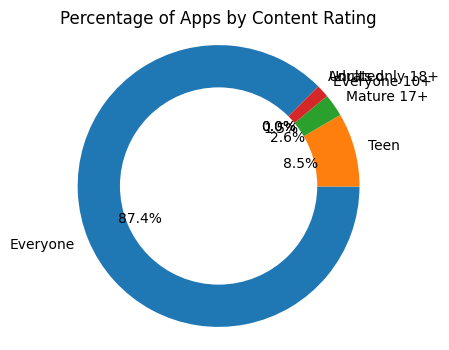

In [31]:
import matplotlib.pyplot as plt

sizes = number_of_apps_content_rating.values
labels = number_of_apps_content_rating.index

plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=45)

# Draw a white circle at the center to make it look like a donut
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Percentage of Apps by Content Rating')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

####

#### Number of Apps with Editors Choice Tag

In [27]:
number_of_apps_editor_choice = df["Editors Choice"].value_counts()
number_of_apps_editor_choice

Editors Choice
False    2311890
True         853
Name: count, dtype: int64

Close to 100% apps are Editor choice

####

#### Ad Supported

In [28]:
number_of_apps_ad_support = df["Ad Supported"].value_counts()
number_of_apps_ad_support

Ad Supported
False    1162025
True     1150718
Name: count, dtype: int64

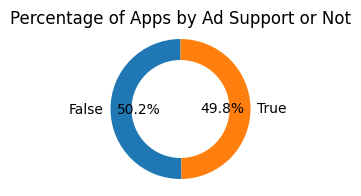

In [29]:
import matplotlib.pyplot as plt

sizes = number_of_apps_ad_support.values
labels = number_of_apps_ad_support.index

plt.figure(figsize=(3, 2))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

# Draw a white circle at the center to make it look like a donut
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Percentage of Apps by Ad Support or Not')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


About 50% apps supports ads and 50% apps does not support ads

####

## Conclusion

**Findings:**
- Popular Categories: Education, Music & Audio, and Tools emerge as the top three categories on the Google Play Store, suggesting high user demand and engagement. Other notable categories include Business, Entertainment, and Lifestyle.
- Rating Distribution: Ratings predominantly range between 3.7 to 4.3, with 5.0, 4.2, 4.3, 4.4, and 4.6 being the most common ratings. Also large percentage of apps have not received any ratings yet.
- Reviews and Installs: Categories such as Action, Tools, Social, Communication, and Casual attract the highest number of user reviews, indicating active user engagement. Meanwhile, Tools, Communication, Productivity, Social, and Entertainment categories lead in terms of app installs.
- Top Installed Apps: Notable apps with the highest number of installs include Facebook, WhatsApp Messenger, Instagram, and Samsung Push Service, reflecting their widespread popularity among users. Most apps which are in this category are google apps which come as in-built apps in smart phones.
- Correlation Analysis: A positive correlation is observed between the number of app installs and user reviews, suggesting that higher review counts often accompany increased app installations.
- App Sizes: The majority of apps fall within the size range of 0 to 100 megabytes, with the role-playing category exhibiting the highest average size among genres.
- Pricing Models: Only a small percentage (1.9%) of apps are paid, with the majority being free. Paid apps tend to have slightly higher average ratings compared to free apps.
- Content Ratings and Editorial Choices: Most apps are designed with a content rating suitable for all users, and a negligible proportion receive the "Editor's Choice" designation.
- Ad Support: Approximately half of the apps support advertisements, while the remaining half do not integrate ad-based monetization strategies.

**Some Key insights:**
- Education, Music & Audio, and Tools emerge as top categories, indicating significant user demand.
- Ratings predominantly range between 3.7 to 4.3, with 5.0 being the highest.
- Action, Tools, Social, Communication, and Casual are highly reviewed categories.
- Facebook, WhatsApp Messenger, Instagram, and Samsung Push Service lead in installs.
- A positive correlation exists between installs and reviews.
- Most apps fall within the size range of 0 to 100 megabytes.
- Only a small percentage of apps are paid, with free apps slightly edging in average ratings.
- Majority of apps cater to all audiences and lack editorial choice designation.
- Ad support is evenly distributed among apps.